Importing The Required Libraries

In [368]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

Reading The Dataset to a pandas dataframe

In [369]:
data=pd.read_csv(r"C:\Users\ANONYMOUS\Downloads\train.csv", delimiter=",")
te=pd.read_csv(r"C:\Users\ANONYMOUS\Downloads\test.csv", delimiter=",")
print(data.keys())
print(te.keys())

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


Selecting The Features And Combining The Traing Set And test set For Preprocessing

In [294]:
X=data.drop(['Survived'], axis=1)

In [295]:
Xf=pd.concat([X, te],axis=0)

# Preprocessing

This Function Replaces The Names Of Passengers With Thier Initials

In [296]:
def Initials(X):
    lmao=[]
    name=X[['Name']]
    dct=name.values
    for j in dct :
        i=j[0][:]
        tials=i[i.find(',')+1:i.find('.')]
        lmao.append(tials)
    X=X.drop(['Name'],axis=1)
    X.insert(0, 'Initials', lmao, True)

    return X

In [297]:
Xf=Initials(Xf)

This Function Replaces The Age Of The Passengers With 1(adult) and 0(child)
(The Function was later not used because it is related to the initials)

In [298]:
def Adult(X):
    age=X['Age']
    age=age.values
    age=np.where(age>=18, 1, 0)
    X.insert(2, 'Adult', age, True)
    age=X.drop(['Age'],axis=1)
    return age

In [299]:
Xf=Xf.drop(['Cabin', 'PassengerId', 'Ticket','Embarked','Age', 'SibSp', 'Parch'],axis=1)

In [300]:
Xf

,Initials,Pclass,Sex,Fare
0,Mr,3,male,7.2500
1,Mrs,1,female,71.2833
2,Miss,3,female,7.9250
3,Mrs,1,female,53.1000
4,Mr,3,male,8.0500
...,...,...,...,...
413,Mr,3,male,8.0500
414,Dona,1,female,108.9000
415,Mr,3,male,7.2500
416,Mr,3,male,8.0500


 Label Encoding Initials And Sex Of Passengers

In [301]:
from sklearn.preprocessing import LabelEncoder
def enc(dtn):
    lb=LabelEncoder()
    #le=LabelEncoder()
    ini=lb.fit_transform(dtn[['Initials']])
    sex=lb.fit_transform(dtn[['Sex']])
    dtn=dtn.drop(['Initials'], axis=1)
    dtn=dtn.drop(['Sex'], axis=1)
    dtn.insert(1,'Initials',ini,True)    
    dtn.insert(1,'Sex',sex,True)
    return dtn

In [302]:
Xf=enc(Xf)

C:\Users\ANONYMOUS\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [303]:
Xf

,Pclass,Sex,Initials,Fare
0,3,1,12,7.2500
1,1,0,13,71.2833
2,3,0,9,7.9250
3,1,0,13,53.1000
4,3,1,12,8.0500
...,...,...,...,...
413,3,1,12,8.0500
414,1,0,3,108.9000
415,3,1,12,7.2500
416,3,1,12,8.0500


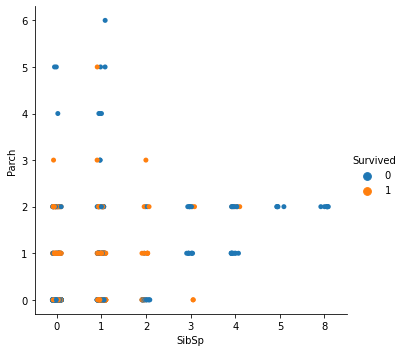

In [370]:
sb.catplot(x='SibSp',y='Parch', hue='Survived', data=data)


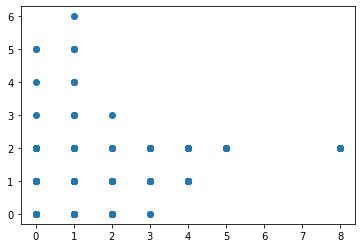

In [371]:
plt.scatter(data[['SibSp']], data[['Parch']])

Seperate The Training Set After Preprocessing

In [304]:
X_train=Xf.iloc[0:891,:]

## Logistic Regression
coding Logistic regression without a logistic regression library

In [372]:

def parameter_initialize(X):
    a=np.zeros((1,X.shape[1]))*0.01
    b=np.zeros((1,1))
    return a,b

def Z(X,a,b):
    z=np.dot(X,a.T).T+b
    #return z.T
    return z
def sigmoid(z):
    a=1/(1+np.exp(-z))
    return a
def foward(X,theta,b):
    z=Z(X,theta,b)
    a=sigmoid(z)
    return a.T
def cost(y_pred, y_ref):
    error=-(y_ref*np.log(y_pred)+(1-y_ref)*np.log(1-y_pred))
    
    return np.sum(error)/y_ref.shape[0]
def Dee_Z(y_pred,Y):
    dee_z=y_pred-Y
    return dee_z
def Dee_parameter(X,dz):
    dee_theta=np.dot(dz.T,X)/X.shape[0]
    dee_b=np.sum(dz)/X.shape[0]
    dee_b=np.reshape(dee_b,(1,1))
    return dee_theta.T, dee_b
    
def back(X,Y,y_pred):
    dz=Dee_Z(y_pred,Y)
    dee_theta, dee_b=Dee_parameter(X,dz)
    return dee_theta, dee_b
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()

def update(theta, b,dee_theta, dee_b, learning_rate):
    m=X.shape[0]
    #print(theta.shape, dee_theta.shape)
    #print(dee_theta.shape, dee_b.shape)
    theta=theta-learning_rate*dee_theta.T
    b=b-learning_rate*dee_b
    return theta,b

import matplotlib.pyplot as plt
def Logistic(X,Y):
    X=ss.fit_transform(X)
    #x_test=ss.fit_transform(x_test)
    #X=X.values
    Y=Y.values
    Y=np.reshape(Y,(len(Y),1))
    J,x=[],[]
    theta, b=parameter_initialize(X)
    for i in range(300):
        y_pred=foward(X,theta,b)
        error=cost(y_pred,Y)
        x.append(i)
        J.append(error)
        dee_theta, dee_b=back(X,Y,y_pred)
        theta,b=update(theta, b,dee_theta, dee_b, 0.1)
        #print(error)
    #plt.plot(x,J)
    return theta,b

In [381]:
sc=StandardScaler()
def predict(X,theta,b):
    m=X.shape[0]
    boun=(342/891)
    X=sc.fit_transform(X)
    y_pred=foward(X,theta,b)
    #print(y_pred)
    y_pred=np.where(y_pred>=0.45, 1, 0)
    return y_pred.squeeze()

Splitting The Training Set into train/test set

In [337]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(X_train,data[['Survived']], test_size=0.3)

Training The Model

In [374]:
theta,b=Logistic(x_train,y_train)

Predicting With The Model

In [382]:
pred=predict(x_test,theta,b)
predt=predict(x_train,theta,b)

Model Evaluation

In [375]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [383]:
print(accuracy_score(y_train, predt))
print(confusion_matrix(y_train, predt))
print(accuracy_score(y_test, pred))
print(confusion_matrix(y_test, pred))

0.7704654895666132
[[318  67]
 [ 76 162]]
0.8022388059701493
[[135  29]
 [ 24  80]]


# Predicting Kaggle Test Set And Saving Result

In [384]:
X_test=Xf.iloc[891:,:]

In [385]:
pred_test=predict(X_test,theta,b)

<ipython-input-381-03fe1e434b30>:8: RuntimeWarning: invalid value encountered in greater_equal
  y_pred=np.where(y_pred>=0.45, 1, 0)


In [386]:
pred_test.

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [387]:
te.insert(2, 'Survived', pred_test, True)
file=te[['PassengerId', 'Survived']]
file.to_csv('mysolution.csv', index=False)